In [109]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.metrics import confusion_matrix

In [39]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"D:/Data/FYP/Skin_data_set/Dataset/Train_data/",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 180 files belonging to 2 classes.


In [40]:
class_names=dataset.class_names
class_names

['No', 'Yes']

In [41]:
len(dataset)

6

In [42]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1]


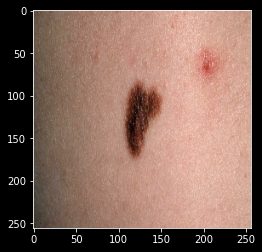

In [43]:
plt.imshow(image_batch[0].numpy().astype('uint8'))

In [59]:
len(dataset)

6

In [90]:
train_size=0.8
len(dataset)*train_size

4.800000000000001

In [91]:
train_ds=dataset.take(3)
len(train_ds)

3

In [92]:
test_ds=dataset.skip(3)
len(test_ds)

3

In [93]:
val_size=0.5
len(dataset)*val_size

3.0

In [94]:
val_ds=test_ds.take(3)
len(val_ds)

3

In [95]:
test_ds=test_ds.skip(0)
len(test_ds)

3

In [96]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [97]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [98]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [99]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [100]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [101]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [102]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [103]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
4/4 [==============================] - 9s 2s/step - loss: 1.0613 - accuracy: 0.3793
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.8353 - accuracy: 0.4569
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.7303 - accuracy: 0.5345
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 0.7086 - accuracy: 0.4569
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.6782 - accuracy: 0.5431
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.6657 - accuracy: 0.6121
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.6771 - accuracy: 0.5431
Epoch 8/10
4/4 [==============================] - 7s 2s/step - loss: 0.6430 - accuracy: 0.6293
Epoch 9/10
4/4 [==============================] - 7s 2s/step - loss: 0.6237 - accuracy: 0.6466
Epoch 10/10
4/4 [==============================] - 8s 2s/step - loss: 0.6541 - accuracy: 0.5431


In [104]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 2s 502ms/step - loss: 0.6105 - accuracy: 0.6562


first image to predict
actual label: No
predicted label: Yes


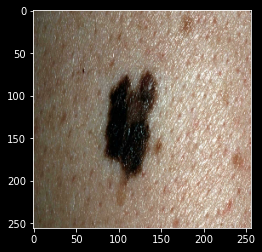

In [105]:

import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

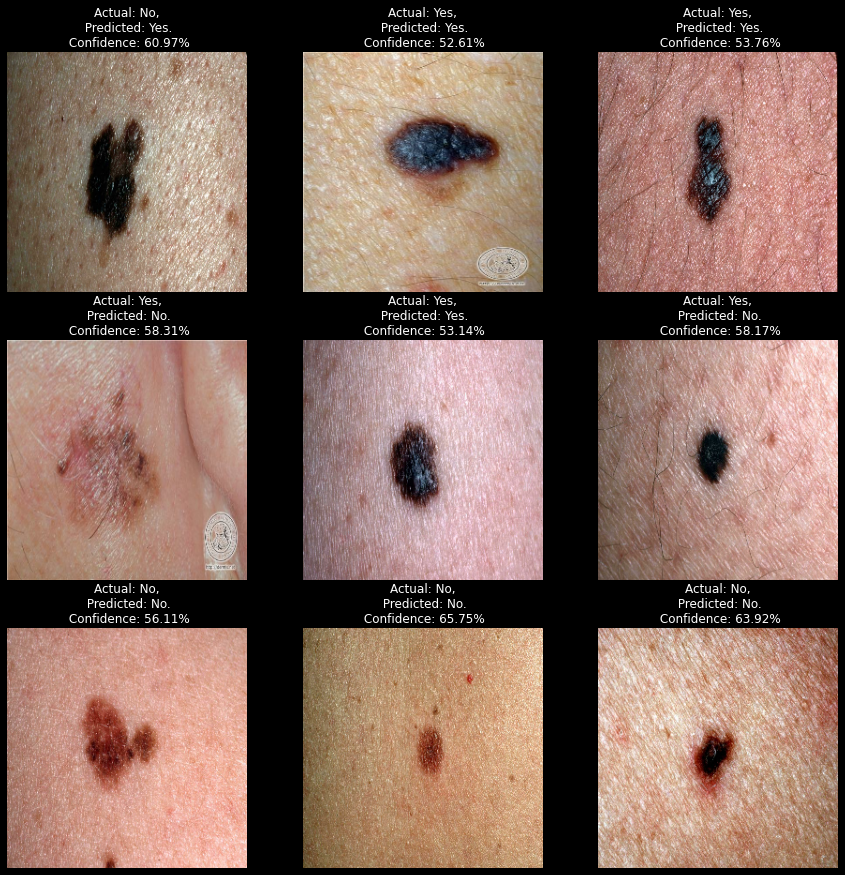

In [108]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
        
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
